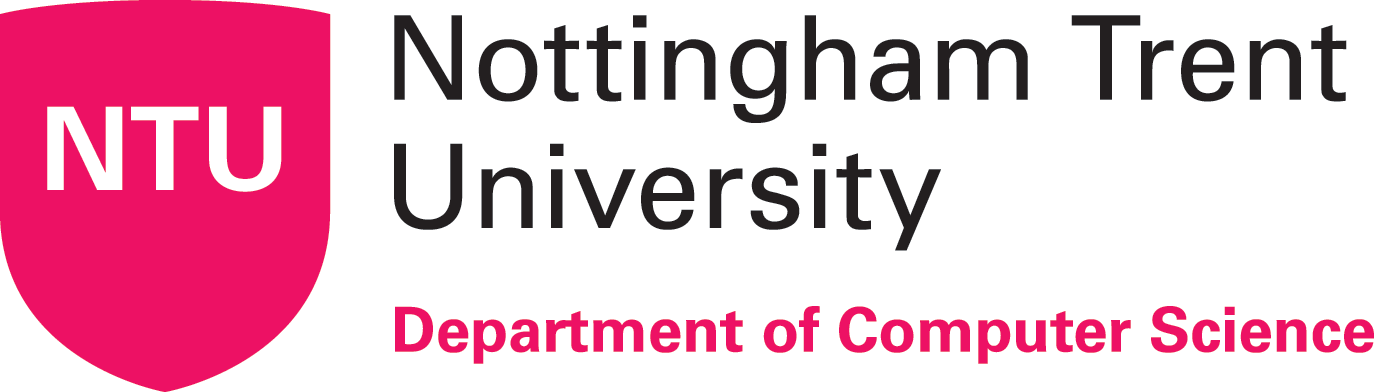

# Python Programming for Real World Data Analytics and GUI Development
## SOFT40161 - Introduction to Computer Programming
### Submission of the Coursework

## Name:
## NTU ID:

<font  color= 'red'> **The Full description of the Coursework is here -** </font>
<a href="https://now.ntu.ac.uk/d2l/le/content/1110621/viewContent/14307207/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-
<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/">Update the link and text (Click here)</a>

# Section 1: Control Structures (12 marks)


In [ ]:
# Explanation and Documentation 

In [1]:
import csv

#Read CSV file
with open('Occupancy_Estimation.csv', 'r') as csv_file:
    csvreader = csv.reader(csv_file)
    for row in csvreader:
        Date = row['Date']
        Time = float(['Time'])
        Sensor1_Temp = float(['S1_Temp'])
        Sensor2_Temp = float(['S2_Temp'])
        Sensor3_Temp = float(['S2_Temp'])


['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']
['2017/12/22', '10:49:41', '24.94', '24.75', '24.56', '25.38', '121', '34', '53', '40', '0.08', '0.19', '0.06', '0.06', '390', '0.769230769231', '0', '0', '1']
['2017/12/22', '10:50:12', '24.94', '24.75', '24.56', '25.44', '121', '33', '53', '40', '0.93', '0.05', '0.06', '0.06', '390', '0.646153846154', '0', '0', '1']
['2017/12/22', '10:50:42', '25', '24.75', '24.5', '25.44', '121', '34', '53', '40', '0.43', '0.11', '0.08', '0.06', '390', '0.519230769231', '0', '0', '1']
['2017/12/22', '10:51:13', '25', '24.75', '24.56', '25.44', '121', '34', '53', '40', '0.41', '0.1', '0.1', '0.09', '390', '0.388461538462', '0', '0', '1']
['2017/12/22', '10:51:44', '25', '24.75', '24.56', '25.44', '121', '34', '54', '40', '0.18', '0.06', '0.06', '0.06', '390', '0.253846153846', 

In [ ]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (24 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)